In [17]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def read_file(filename):
    df = pandas.read_csv(filename,index_col=0)
    nodesNames = df.columns
    nodesDict = {n:i for i,n in enumerate(nodesNames)}
    matrixDistance = df.values
    return nodesNames,matrixDistance,nodesDict

filename = 'adjacency_matrix.csv'
nnodesNames,matrixDistance,nodesDict = read_file(filename)

In [20]:
def create_random_nodes(n,lim):
    matrixPositions = np.random.uniform(low=0,high=lim,size=(n,2))
    letters = [chr(x) for x in range(ord('A'),ord('Z')+1)]
    nodesNames = letters[:n]
    nodesDict = {n:i for i,n in enumerate(nodesNames)}
    matrixDistance = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            x1,y1 = matrixPositions[i,0],matrixPositions[i,1]
            x2,y2 = matrixPositions[j,0],matrixPositions[j,1]
            matrixDistance[i,j] = np.sqrt( (x1-x2)**2 + (y1-y2)**2  )
            matrixDistance[j,i] = matrixDistance[i,j]
    return nodesNames,matrixPositions,matrixDistance,nodesDict
n = 10
lim = 100
nodesNames,matrixPositions,matrixDistance,nodesDict = create_random_nodes(n,lim)

In [23]:
def evaluate_individual(ind,nnodesNames,nodesDict,matrixDistance):
    fit = 0
    for i in range(len(ind)-1):
        n1,n2 = ind[i],ind[i+1]
        fit+= matrixDistance[ nodesDict[n1],nodesDict[n2] ]
    return fit

n = 10
lim = 100
nodesNames,matrixPositions,matrixDistance,nodesDict = create_random_nodes(n,lim)
ind = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','A']
fit = evaluate_individual(ind,nnodesNames,nodesDict,matrixDistance)
print(fit)

676.2495939757833


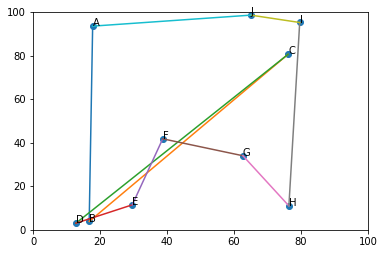

536.6314738964613


In [30]:
def draw_individual(ind,nodesNames,nodesDict,matrixPositions,lim):
    plt.figure()
    plt.scatter(matrixPositions[:,0],matrixPositions[:,1])
    for x,y,n in zip(matrixPositions[:,0],matrixPositions[:,1],nodesNames):
        plt.text(x,y,n)
    for i in range(len(ind)-1):
        n1,n2 = ind[i],ind[i+1]
        x1,y1 = matrixPositions[ nodesDict[n1] ,0],matrixPositions[ nodesDict[n1] ,1]
        x2,y2 = matrixPositions[ nodesDict[n2] ,0],matrixPositions[ nodesDict[n2] ,1]
        plt.plot([x1,x2],[y1,y2])
        
    plt.xlim([0,lim])
    plt.ylim([0,lim])
    plt.show()
    
n = 10
lim = 100
nodesNames,matrixPositions,matrixDistance,nodesDict = create_random_nodes(n,lim)

ind = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','A']
fit = evaluate_individual(ind,nodesNames,nodesDict,matrixDistance)
draw_individual(ind,nodesNames,nodesDict,matrixPositions,lim)
print(fit)